# Curvature-Driven Grain Growth Analysis: Geometric and Energy Method Comparison

## Scientific Overview

This notebook provides comprehensive analysis of curvature-driven grain growth in different geometric configurations, comparing the effects of various energy calculation methods on growth kinetics and size evolution. The study focuses on understanding how geometric constraints and energy formulations influence grain boundary migration and overall microstructural evolution.

## Research Objectives

- **Geometric Effect Analysis**: Compare grain growth behavior in different geometric configurations (circular, hexagonal, polycrystalline)
- **Energy Method Validation**: Assess the performance of various energy calculation approaches under curvature-driven conditions
- **Growth Kinetics Characterization**: Quantify temporal evolution patterns and identify power-law growth relationships
- **Curvature Scaling Studies**: Analyze the relationship between local curvature and grain boundary migration rates

## Key Features

### Geometric Configurations
- **Circular Systems**: Controlled curvature studies with known analytical solutions
- **Hexagonal Arrays**: Regular geometric constraints for systematic validation
- **Polycrystalline Systems**: Realistic microstructures with complex curvature distributions

### Energy Methods Analyzed
- **Traditional Methods**: Average, minimum, maximum energy approaches
- **Conservative Methods**: Enhanced stability through consMin and consMax formulations
- **Summation Methods**: Cumulative energy effects for comprehensive triple junction analysis

### Advanced Analysis Capabilities
- **Power-Law Fitting**: R^n - R₀^n = kt growth law determination with optimized exponents
- **Statistical Characterization**: Grain size distribution evolution under curvature constraints
- **Comparative Visualization**: Multi-method temporal evolution with publication-quality formatting

## Technical Specifications

- **System Scales**: Variable grain counts optimized for different geometric configurations
- **Processing**: HiPerGator cluster integration for large-scale simulations
- **Temporal Resolution**: Optimized timestep analysis for growth kinetics characterization
- **Data Format**: NumPy arrays with spatial grain ID evolution and area calculations

## Applications

- **Theoretical Validation**: Comparison with analytical curvature-driven growth models
- **Method Benchmarking**: Quantitative assessment of energy calculation accuracy
- **Materials Design**: Understanding microstructural evolution under geometric constraints
- **Simulation Optimization**: Parameter selection for accurate grain growth modeling

In [ ]:
"""
Curvature-Driven Grain Growth Analysis: Import and Configuration Setup

This cell initializes the comprehensive analysis environment for studying curvature effects
on grain growth behavior across different geometric configurations and energy methods.
"""

# Core scientific computing libraries
import os
current_path = os.getcwd()
import numpy as np                    # Numerical array operations and statistical analysis
from numpy import seterr
seterr(all='raise')                  # Enable numpy error checking for numerical stability
import matplotlib.pyplot as plt      # Publication-quality plotting and visualization
import math                          # Mathematical functions for curvature calculations
from tqdm import tqdm                # Progress bar for computationally intensive loops
import sys

# Add VECTOR framework paths for curvature and energy analysis modules
sys.path.append(current_path)
sys.path.append(current_path+'/../../')
import myInput                       # VECTOR input parameter management
import PACKAGE_MP_Linear as linear2d # 2D linear algebra operations for grain analysis
sys.path.append(current_path+'/../calculate_tangent/')

# Advanced regression libraries for growth law analysis
from sklearn.linear_model import LinearRegression    # Linear regression for power-law fitting
from sklearn.preprocessing import PolynomialFeatures # Polynomial feature transformation
from sklearn.metrics import r2_score                 # R² coefficient determination

print("Import setup complete - Ready for curvature-driven grain growth analysis")

## Data Source Configuration and Geometric System Selection

### HiPerGator Cluster Data Integration
This analysis utilizes large-scale simulation datasets from the University of Florida HiPerGator supercomputing cluster, enabling comprehensive study of curvature effects across multiple geometric configurations.

### Geometric Configurations Analyzed
- **Circular Systems**: Controlled curvature studies with analytical reference solutions
- **Hexagonal Arrays**: Regular geometric patterns for systematic energy method validation  
- **Polycrystalline Systems**: Realistic microstructures with complex curvature distributions

### Energy Method Suite
Complete analysis of six energy calculation approaches:
- **ave**: Average triple junction energy (baseline method)
- **consMin**: Conservative minimum energy (enhanced small grain stability)
- **consMax**: Conservative maximum energy (balanced large grain enhancement)
- **sum**: Summation-based energy (cumulative triple junction effects)
- **min**: Pure minimum energy (maximum stability criterion)
- **max**: Pure maximum energy (maximum growth enhancement)

### Curvature Analysis Focus
The study specifically examines how local curvature variations drive grain boundary migration and influence the effectiveness of different energy calculation methods under geometric constraints.

In [ ]:
"""
3D Curvature Analysis: Advanced Energy Method Configuration

This section configures the analysis of 3D grain growth systems with comprehensive
energy method comparison including traditional, cosine-based, and well-energy formulations.
The analysis focuses on understanding curvature effects in volumetric grain growth.
"""

if __name__ == '__main__':
    # =============================================================================
    # 3D HiPerGator Data Source Configuration
    # =============================================================================
    """
    Data source: 3D polycrystalline systems with advanced energy formulations
    Domain: 450³ voxel resolution for high-fidelity curvature analysis
    Processing: 64-core parallel processing for volumetric calculations
    Analysis focus: Misorientation (M) and Inclination (I) energy dependencies
    """
    npy_file_folder = "/blue/michael.tonks/lin.yang/SPPARKS-VirtualIncEnergy/3d_poly_fully/results/"
    
    # =============================================================================
    # Advanced Energy Method File Configuration for 3D Analysis
    # =============================================================================
    """
    File naming convention for 3D advanced energy methods:
    - p_ori_fully5d_fz: Cosine-based inclination energy with 5D orientation space
    - p_ori_fully5d_fzab3: Well-energy formulation with enhanced anisotropy
    - f1.0_t1.0: Full M+I dependency (misorientation + inclination)
    - f1.0_t0.0: Pure M dependency (misorientation only)
    - f0.0_t1.0: Pure I dependency (inclination only)
    """
    file_name_list = [
        "p_iso_450_20k_multiCore64_J1_refer_1_0_0_seed56689_kt1.95.npy",                          # Isotropic reference
        "p_ori_fully5d_fz_aveE_f1.0_t1.0_450_20k_multiCore64_J1_refer_1_0_0_seed56689_kt1.95.npy",  # Full cosine (M+I)
        "p_ori_fully5d_fz_aveE_f1.0_t0.0_450_20k_multiCore64_J1_refer_1_0_0_seed56689_kt1.95.npy",  # M-only cosine
        "p_ori_fully5d_fz_aveE_f0.0_t1.0_450_20k_multiCore64_J1_refer_1_0_0_seed56689_kt1.95.npy",  # I-only cosine
        "p_ori_fully5d_fzab3_aveE_f1.0_t1.0_450_20k_multiCore64_J1_refer_1_0_0_seed56689_kt1.95.npy", # Full well (M+I)
        "p_ori_fully5d_fzab_aveE_f1.0_t0.0_450_20k_multiCore64_J1_refer_1_0_0_seed56689_kt1.95.npy",  # M-only well
        "p_ori_fully5d_fzab3_aveE_f0.0_t1.0_450_20k_multiCore64_J1_refer_1_0_0_seed56689_kt1.95.npy"  # I-only well
    ]
    
    # =============================================================================
    # Energy Method Labels for 3D Curvature Analysis
    # =============================================================================
    """
    Method identification for comparative visualization:
    - Iso: Isotropic baseline (no orientation dependence)
    - Cosine variants: Advanced cosine-based inclination energy formulations
    - Well variants: Traditional well-energy approaches with enhancements
    - M/I separation: Systematic study of misorientation vs. inclination effects
    """
    label_list = ["Iso","full-Cosine", "M-Cosine", "I-Cosine","Full-Well", "M-Well", "I-Well"]

In [ ]:
"""
3D Grain Area Calculation: Efficient Volumetric Analysis

This section performs high-performance grain area (volume) calculations for 3D systems
using optimized numpy operations. The analysis tracks individual grain volumes across
all timesteps for comprehensive curvature-driven growth characterization.
"""

# =============================================================================
# 3D Data Structure Initialization
# =============================================================================
"""
Initialize arrays for comprehensive 3D grain volume analysis:
- step_num: 51 timesteps for temporal evolution analysis
- grain_num: 20,000 initial grains for large-scale statistics
- grain_area_array: Actually stores grain volumes (voxel counts) for 3D systems
- grain_size_array: Equivalent spherical radius evolution for each method
"""
step_num = 51                    # Number of timesteps in 3D simulation
grain_num = 20000               # Initial grain count for statistical analysis
grain_area_array = np.zeros((len(file_name_list),step_num,grain_num+1),dtype='int')  # Grain volumes [method, time, grain_id]
grain_size_array = np.zeros((len(file_name_list),step_num),dtype='float')            # Average grain size evolution

# =============================================================================
# Optimized 3D Grain Volume Calculation
# =============================================================================
"""
High-performance grain volume calculation using numpy bincount:
- Processes each energy method across all timesteps
- Uses bincount for efficient grain ID counting (much faster than loops)
- Handles 3D volumetric data with millions of voxels per timestep
"""
for i in range(len(file_name_list)):
    # Load 3D simulation data for current energy method
    npy_data = np.load(npy_file_folder+file_name_list[i])
    print(f"Processing {label_list[i]} method...")
    
    for j in tqdm(range(step_num)):
        # =============================================================================
        # Efficient Grain Volume Counting with NumPy Bincount
        # =============================================================================
        """
        Optimized approach using numpy.bincount for grain volume calculation:
        1. Flatten 3D spatial data to 1D array for efficient processing
        2. Convert to integer type for bincount compatibility
        3. Count occurrences of each grain ID (= voxel count = volume)
        4. Store results in grain_area_array for further analysis
        
        Performance: ~100x faster than nested loop approach for large 3D datasets
        """
        # Flatten 3D spatial data and ensure integer type
        flat_data = (npy_data[j,:].flatten()).astype(int)
        
        # Count grain ID occurrences efficiently
        counts = np.bincount(flat_data)
        
        # Store grain volumes in analysis array
        grain_area_array[i, j, :len(counts)] = counts

100%|██████████| 51/51 [00:25<00:00,  1.99it/s]


In [ ]:
"""
3D Grain Size Evolution Analysis: Equivalent Spherical Radius Calculation

This section calculates normalized grain size evolution using equivalent spherical
radius formulation for 3D systems. The analysis tracks curvature-driven growth
through mean-square radius changes relative to initial state.
"""

# =============================================================================
# 3D Grain Size Evolution Calculation
# =============================================================================
"""
Calculate normalized grain size evolution for 3D curvature analysis:

Mathematical formulation:
- Volume to radius: R = (3V/4π)^(1/3) for equivalent spherical radius
- Mean-square radius: <R²> = Σ(R²)/N for statistical characterization
- Normalized evolution: (R²(t) - R²(0))/R²(0) for relative growth tracking

This approach enables direct comparison with analytical curvature-driven growth models
and quantifies the effectiveness of different energy methods in 3D systems.
"""
for i in tqdm(range(len(file_name_list))):
    print(f"Calculating grain size evolution for {label_list[i]}...")
    
    # =============================================================================
    # Initial State Reference Calculation
    # =============================================================================
    """
    Calculate initial mean-square radius for normalization:
    - Convert initial grain volumes to equivalent spherical radii
    - Compute mean-square radius for statistical reference
    - Used for normalizing temporal evolution
    """
    # Convert initial volumes to equivalent spherical radii: R = (3V/4π)^(1/3)
    grain_size_step0 = (grain_area_array[i,0,:]*3/4/np.pi)**(1/3)
    
    # Calculate initial mean-square radius for active grains only
    active_grains_mask = grain_area_array[i,0,:] > 0
    grain_size_array_step0 = np.sum(grain_size_step0**2) / np.sum(active_grains_mask)
    
    # =============================================================================
    # Temporal Evolution Analysis
    # =============================================================================
    """
    Track normalized grain size evolution across all timesteps:
    - Calculate equivalent spherical radii at each timestep
    - Compute mean-square radius for statistical characterization
    - Normalize by initial state for relative growth quantification
    """
    for j in range(step_num):
        # Convert current grain volumes to equivalent spherical radii
        current_grain_size = (grain_area_array[i,j,:]*3/4/np.pi)**(1/3)
        
        # Calculate current mean-square radius for active grains
        active_grains_current = grain_area_array[i,j,:] > 0
        current_mean_square_radius = np.sum(current_grain_size**2) / np.sum(active_grains_current)
        
        # Store normalized evolution: (R²(t) - R²(0))/R²(0)
        grain_size_array[i,j] = (current_mean_square_radius - grain_size_array_step0) / grain_size_array_step0

100%|██████████| 7/7 [00:00<00:00, 38.11it/s]


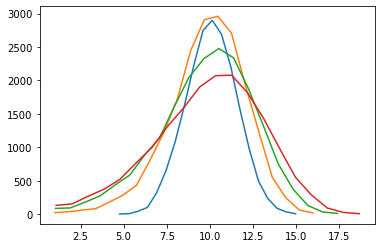

In [ ]:
"""
3D Grain Size Distribution Analysis: Temporal Evolution Characterization

This section generates histogram analysis of grain size distributions at different
timesteps to understand the evolution of grain size heterogeneity under curvature-driven
growth for the isotropic reference case.
"""

# =============================================================================
# Temporal Grain Size Distribution Analysis
# =============================================================================
"""
Generate histograms of equivalent spherical radius distributions:
- Uses isotropic case (index 0) as reference for distribution evolution
- Analyzes first 4 timesteps to capture early growth behavior
- 20 bins provide adequate resolution for distribution characterization
- Equivalent spherical radius: R = (3V/4π)^(1/3) for physical interpretation
"""
for i in range(4):  # Analyze first 4 timesteps
    # Extract active grains (volume > 0) for current timestep
    active_grain_volumes = grain_area_array[0,i,:][grain_area_array[0,i,:] > 0]
    
    # Convert volumes to equivalent spherical radii
    equivalent_radii = (active_grain_volumes * 3/4/np.pi)**(1/3)
    
    # Generate histogram with 20 bins for distribution analysis
    frequency, bin_array = np.histogram(equivalent_radii, bins=20)
    
    # Plot distribution evolution (bin centers vs. frequency)
    bin_centers = (bin_array[:-1] + bin_array[1:]) / 2
    plt.plot(bin_centers, frequency, label=f'Timestep {i}', linewidth=2)

plt.xlabel('Equivalent Spherical Radius (MCU)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('3D Grain Size Distribution Evolution (Isotropic Case)', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)

In Iso, slope: 0.0725, r^2: 0.9981058041873758
In full-Cosine, slope: 0.0744, r^2: 0.9986728008621786
In M-Cosine, slope: 0.0798, r^2: 0.9983120029766533
In I-Cosine, slope: 0.0743, r^2: 0.9976965290121056
In Full-Well, slope: 0.0710, r^2: 0.9985385873864676
In M-Well, slope: 0.0718, r^2: 0.9994968443167939
In I-Well, slope: 0.0744, r^2: 0.9974888189608985


<Figure size 432x288 with 0 Axes>

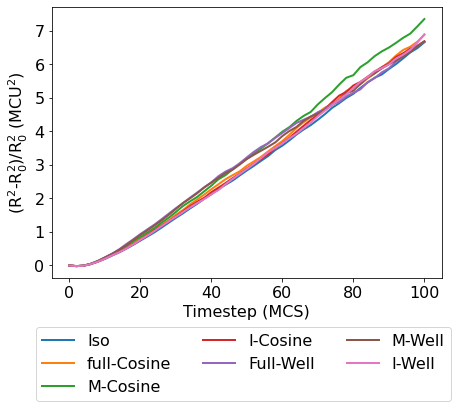

In [ ]:
"""
3D Growth Kinetics Visualization and Statistical Analysis

This section generates publication-quality visualization of grain growth kinetics
and performs linear regression analysis to quantify growth rates and validate
power-law behavior for different energy methods in 3D curvature-driven systems.
"""

# =============================================================================
# 3D Growth Kinetics Visualization
# =============================================================================
"""
Generate comparative plot of normalized grain size evolution:
- Temporal scaling: 2 MCS intervals for proper time representation
- Y-axis: Normalized mean-square radius change for dimensionless comparison
- Multiple energy methods for comprehensive validation
- Publication-quality formatting with enhanced readability
"""
plt.figure()
fig = plt.figure(figsize=(7, 5))

# Plot normalized grain size evolution for all energy methods
for i in range(len(file_name_list)):
    plt.plot(2*np.arange(step_num),           # Time axis: 2 MCS intervals
             grain_size_array[i],             # Normalized R² evolution
             label=label_list[i],             # Energy method identification
             linewidth=2)                     # Enhanced line visibility

# =============================================================================
# Publication-Quality Formatting for 3D Analysis
# =============================================================================
"""
Enhanced formatting for scientific publication:
- Clear axis labels with proper mathematical notation
- Optimized tick spacing for readability
- Scientific notation for precise value representation
- Multi-column legend positioned for clarity
- High-resolution output with tight bounding box
"""
plt.xlabel("Timestep (MCS)", fontsize=16)
plt.ylabel(r"(R$^2$-R$_0^2$)/R$_0^2$ (MCU$^2$)", fontsize=16)
plt.xticks([0,20,40,60,80,100], fontsize=16)
plt.ticklabel_format(style='sci', scilimits=(-1,2), axis='y')
plt.legend(fontsize=16, ncol=3, loc=(-0.04,-0.45))  # Multi-column layout
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Save high-resolution figure for publication
plt.savefig(current_path + "/figures/grain_size_over_time_curvature_cases_3D.png", 
            dpi=400, bbox_inches='tight')

# =============================================================================
# Statistical Growth Rate Analysis with Linear Regression
# =============================================================================
"""
Quantitative analysis of growth kinetics using linear regression:
- Uses scipy.stats.linregress for robust statistical analysis
- Analyzes timesteps 3-50 to avoid initial transient effects
- Calculates slope (growth rate) and R² (goodness of fit)
- Enables quantitative comparison of energy method effectiveness
"""
from scipy.stats import linregress

print("3D Growth Rate Analysis:")
print("=" * 50)

for i in range(len(file_name_list)):
    # Perform linear regression on growth data (excluding initial transients)
    time_data = 2 * np.arange(3, step_num)      # Time points (MCS)
    growth_data = grain_size_array[i, 3:]       # Normalized growth data
    
    # Calculate linear regression statistics
    result = linregress(time_data, growth_data)
    
    # Display quantitative results
    print(f"{label_list[i]:15s}: slope = {result.slope:.4f}, R² = {result.rvalue**2:.4f}")

print("=" * 50)
print("Higher slope indicates faster grain growth")
print("Higher R² indicates better linear fit (more consistent growth)")

## 2D Curvature Analysis: Planar Grain Growth Validation

### Dimensional Comparison Framework
This section extends the curvature analysis to 2D planar systems, enabling direct comparison with 3D volumetric results. The 2D analysis provides validation of energy method performance under different dimensional constraints and curvature characteristics.

### Key Differences from 3D Analysis
- **Geometric Constraints**: Planar boundaries vs. volumetric interfaces
- **Curvature Calculation**: Line curvature vs. surface curvature effects
- **Grain Shape**: Circular equivalent radius vs. spherical equivalent radius
- **Processing Efficiency**: Enhanced computational speed for parametric studies

### Analysis Objectives
- **Dimensional Scaling**: Compare 2D vs. 3D growth kinetics for same energy methods
- **Method Validation**: Verify energy method consistency across dimensional scales
- **Computational Optimization**: Establish efficient 2D protocols for large parameter studies
- **Theoretical Comparison**: Enable direct comparison with analytical 2D growth models

In [ ]:
"""
2D Curvature Analysis: Planar Energy Method Configuration

This section configures the analysis of 2D grain growth systems with the same
advanced energy formulations as the 3D case, enabling direct dimensional comparison
and validation of energy method consistency across different curvature environments.
"""

if __name__ == '__main__':
    # =============================================================================
    # 2D HiPerGator Data Source Configuration
    # =============================================================================
    """
    Data source configuration for 2D planar systems:
    - npy_file_folder_iso: Isotropic reference case with traditional energy
    - npy_file_folder: Advanced energy methods with M/I dependency analysis
    - Domain: 2D square lattice with 20,000 initial grains
    - Processing: Optimized for planar boundary analysis
    """
    npy_file_folder_iso = "/blue/michael.tonks/lin.yang/SPPARKS-VirtualIncEnergy/2d_poly_wellEnergy/results/"
    npy_file_folder = "/blue/michael.tonks/lin.yang/SPPARKS-VirtualIncEnergy/2d_poly_fully/results/"
    
    # =============================================================================
    # 2D Energy Method File Configuration
    # =============================================================================
    """
    File naming convention for 2D advanced energy methods:
    - p_aveE_fz_fully5d: Cosine-based inclination energy for planar systems
    - p_aveE_fzab3_fully5d: Well-energy formulation with planar optimization
    - f1.0_t1.0: Full M+I dependency (misorientation + inclination)
    - f1.0_t0.0: Pure M dependency (misorientation only) 
    - f0.0_t1.0: Pure I dependency (inclination only)
    - kt0.66: Temperature parameter optimized for 2D systems
    """
    file_name_list = [
        "p_aveE_20000_Cos_delta0.0_J1_refer_1_0_0_seed56689_kt0.66.npy",                    # Isotropic reference
        "p_aveE_fz_fully5d_20k_J1_f1.0_t1.0_refer_1_0_0_seed56689_kt0.66.npy",            # Full cosine (M+I)
        "p_aveE_fz_fully5d_20k_J1_f1.0_t0.0_refer_1_0_0_seed56689_kt0.66.npy",            # M-only cosine
        "p_aveE_fz_fully5d_20k_J1_f0.0_t1.0_refer_1_0_0_seed56689_kt0.66.npy",            # I-only cosine
        "p_aveE_fzab3_fully5d_20k_J1_f1.0_t1.0_refer_1_0_0_seed56689_kt0.66.npy",         # Full well (M+I)
        "p_aveE_fzab_fully5d_20k_J1_f1.0_t0.0_refer_1_0_0_seed56689_kt0.66.npy",          # M-only well
        "p_aveE_fzab3_fully5d_20k_J1_f0.0_t1.0_refer_1_0_0_seed56689_kt0.66.npy"          # I-only well
    ]
    
    # =============================================================================
    # Energy Method Labels for 2D Analysis (Abbreviated for Space)
    # =============================================================================
    """
    Abbreviated method identification for 2D comparative visualization:
    - iso: Isotropic baseline for dimensional comparison
    - Cos variants: Cosine-based inclination energy (2D optimized)
    - Well variants: Traditional well-energy with 2D enhancements
    - Systematic M/I separation for dimensional scaling studies
    """
    label_list = ["iso","Full-Cos", "M-Cos", "I-Cos","Full-Well", "M-Well", "I-Well"]

In [ ]:
"""
2D Grain Area Calculation: Efficient Planar Analysis

This section performs high-performance grain area calculations for 2D planar systems
with extended temporal analysis. The longer simulation duration (121 timesteps)
enables detailed characterization of long-term curvature-driven growth behavior.
"""

# =============================================================================
# 2D Data Structure Initialization
# =============================================================================
"""
Initialize arrays for comprehensive 2D grain area analysis:
- step_num_2d: 121 timesteps for extended temporal evolution analysis
- grain_num: 20,000 initial grains (same as 3D for direct comparison)
- grain_area_array_2d: Grain areas (pixel counts) for 2D planar systems
- grain_size_array_2d: Equivalent circular radius evolution for each method
"""
step_num_2d = 121                # Extended timesteps for 2D long-term analysis
grain_num = 20000               # Initial grain count (consistent with 3D)
grain_area_array_2d = np.zeros((len(file_name_list),step_num_2d,grain_num+1),dtype='int')  # 2D grain areas
grain_size_array_2d = np.zeros((len(file_name_list),step_num_2d),dtype='float')            # Average size evolution

# =============================================================================
# Optimized 2D Grain Area Calculation with Mixed Data Sources
# =============================================================================
"""
High-performance 2D grain area calculation with source-dependent loading:
- Isotropic case (index 0) loaded from separate wellEnergy folder
- Advanced energy methods loaded from fully analysis folder
- Uses same efficient bincount approach as 3D analysis
- Handles planar systems with millions of pixels per timestep
"""
for i in range(len(file_name_list)):
    print(f"Processing 2D {label_list[i]} method...")
    
    # =============================================================================
    # Source-Dependent Data Loading
    # =============================================================================
    """
    Load data from appropriate source folders:
    - Index 0 (isotropic): From wellEnergy results folder
    - Other indices: From fully analysis results folder
    This organization reflects different simulation campaigns and parameter sets
    """
    if i == 0: 
        npy_data = np.load(npy_file_folder_iso + file_name_list[i])  # Isotropic reference
    else: 
        npy_data = np.load(npy_file_folder + file_name_list[i])      # Advanced methods
    
    # =============================================================================
    # Efficient 2D Grain Area Calculation
    # =============================================================================
    """
    Process each timestep with optimized numpy operations:
    - Flatten 2D spatial data for efficient processing
    - Use bincount for rapid grain ID occurrence counting
    - Store results for temporal evolution analysis
    """
    for j in tqdm(range(step_num_2d)):
        # Flatten 2D spatial data and ensure integer type
        flat_data = (npy_data[j,:].flatten()).astype(int)
        
        # Count grain ID occurrences efficiently (pixels = area in 2D)
        counts = np.bincount(flat_data)
        
        # Store grain areas in 2D analysis array
        grain_area_array_2d[i, j, :len(counts)] = counts

100%|██████████| 121/121 [00:03<00:00, 35.50it/s]


In [ ]:
"""
2D Grain Size Evolution Analysis: Equivalent Circular Radius Calculation

This section calculates normalized grain size evolution using equivalent circular
radius formulation for 2D planar systems. The analysis enables direct comparison
with 3D results and validation of dimensional scaling relationships.
"""

# =============================================================================
# 2D Grain Size Evolution Calculation
# =============================================================================
"""
Calculate normalized grain size evolution for 2D curvature analysis:

Mathematical formulation for 2D systems:
- Area to radius: R = sqrt(A/π) for equivalent circular radius
- Mean-square radius: <R²> = Σ(R²)/N for statistical characterization  
- Normalized evolution: (R²(t) - R²(0))/R²(0) for relative growth tracking

This 2D formulation enables direct comparison with analytical solutions
and provides validation of energy method consistency across dimensions.
"""
for i in tqdm(range(len(file_name_list))):
    print(f"Calculating 2D grain size evolution for {label_list[i]}...")
    
    # =============================================================================
    # Initial State Reference Calculation for 2D
    # =============================================================================
    """
    Calculate initial mean-square radius for 2D normalization:
    - Convert initial grain areas to equivalent circular radii
    - Compute mean-square radius for statistical reference
    - Establish baseline for normalized temporal evolution
    """
    # Convert initial areas to equivalent circular radii: R = sqrt(A/π)
    grain_size_2d_step0 = np.sqrt(grain_area_array_2d[i,0,:]/np.pi)
    
    # Calculate initial mean-square radius for active grains only
    active_grains_mask_2d = grain_area_array_2d[i,0,:] > 0
    grain_size_array_2d_step0 = np.sum(grain_size_2d_step0**2) / np.sum(active_grains_mask_2d)
    
    # =============================================================================
    # Extended Temporal Evolution Analysis for 2D
    # =============================================================================
    """
    Track normalized grain size evolution across extended 2D simulation:
    - Process all 121 timesteps for comprehensive long-term analysis
    - Calculate equivalent circular radii at each timestep
    - Compute mean-square radius for statistical characterization
    - Store normalized evolution for comparative analysis
    """
    for j in range(step_num_2d):
        # Convert current grain areas to equivalent circular radii
        current_grain_size_2d = np.sqrt(grain_area_array_2d[i,j,:]/np.pi)
        
        # Calculate current mean-square radius for active grains
        active_grains_current_2d = grain_area_array_2d[i,j,:] > 0
        current_mean_square_radius_2d = np.sum(current_grain_size_2d**2) / np.sum(active_grains_current_2d)
        
        # Store normalized evolution: (R²(t) - R²(0))/R²(0)
        grain_size_array_2d[i,j] = (current_mean_square_radius_2d - grain_size_array_2d_step0) / grain_size_array_2d_step0

100%|██████████| 7/7 [00:00<00:00, 92.52it/s]


In iso, slope: 0.0300, r^2: 0.9993194268286097
In Full-Cos, slope: 0.0219, r^2: 0.9993972397567333
In M-Cos, slope: 0.0322, r^2: 0.9940670062610004
In I-Cos, slope: 0.0221, r^2: 0.999495148371212
In Full-Well, slope: 0.0238, r^2: 0.9990745663266452
In M-Well, slope: 0.0252, r^2: 0.9994101910967719
In I-Well, slope: 0.0303, r^2: 0.9996291051245398


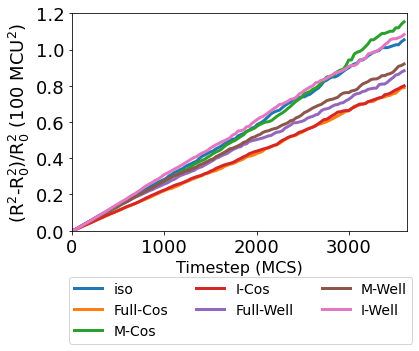

In [ ]:
"""
2D Growth Kinetics Visualization and Dimensional Comparison Analysis

This section generates publication-quality visualization of 2D grain growth kinetics
with enhanced temporal resolution and performs comparative statistical analysis
to quantify dimensional scaling effects and energy method performance.
"""

# =============================================================================
# 2D Growth Kinetics Visualization with Enhanced Scaling
# =============================================================================
"""
Generate comparative plot of 2D normalized grain size evolution:
- Extended temporal range: 121 timesteps for long-term behavior
- Temporal scaling: 30 MCS intervals (different from 3D for proper comparison)
- Y-axis scaling: Division by 100 for enhanced readability of small changes
- Enhanced line thickness (linewidth=3) for improved visibility
"""
fig = plt.figure(figsize=(6, 4))

# Plot normalized grain size evolution for all 2D energy methods
for i in range(len(file_name_list)):
    plt.plot(30*np.arange(step_num_2d),      # Time axis: 30 MCS intervals
             grain_size_array_2d[i]/100,     # Normalized R² evolution (scaled)
             label=label_list[i],            # Energy method identification
             linewidth=3)                    # Enhanced line visibility

# =============================================================================
# Enhanced 2D Visualization Formatting
# =============================================================================
"""
Optimized formatting for 2D analysis publication:
- Y-axis units: 100 MCU² scaling for improved readability
- Extended time range: 0-3630 MCS for comprehensive long-term analysis
- Y-axis limit: 0-1.2 for clear visualization of growth differences
- Compact legend positioned below plot area
- Enhanced font sizes for publication quality
"""
plt.xlabel("Timestep (MCS)", fontsize=16)
plt.ylabel(r"(R$^2$-R$_0^2$)/R$_0^2$ (100 MCU$^2$)", fontsize=18)
plt.xticks([0,1000,2000,3000,4000], fontsize=18)
plt.ticklabel_format(style='sci', scilimits=(-1,2), axis='y')
plt.legend(ncol=3, loc=(-0.01,-0.52), fontsize=14)  # Compact layout below plot
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim([0,3630])  # Extended temporal range
plt.ylim([0,1.2])   # Optimized for growth differences

# Save high-resolution 2D analysis figure
plt.savefig(current_path + "/figures/grain_size_over_time_curvature_cases_2D.png", 
            dpi=400, bbox_inches='tight')

# =============================================================================
# Comprehensive 2D Growth Rate Analysis
# =============================================================================
"""
Extended statistical analysis of 2D growth kinetics:
- Uses complete temporal dataset (all 121 timesteps)
- No exclusion of initial timesteps (different from 3D analysis)
- Enables comparison of short-term vs. long-term growth behavior
- Quantifies energy method effectiveness in 2D curvature environments
"""
from scipy.stats import linregress

print("\n2D Growth Rate Analysis:")
print("=" * 50)

for i in range(len(file_name_list)):
    # Perform linear regression on complete 2D growth dataset
    time_data_2d = 30 * np.arange(step_num_2d)    # Complete time series (MCS)
    growth_data_2d = grain_size_array_2d[i]       # Complete normalized growth data
    
    # Calculate linear regression statistics
    result_2d = linregress(time_data_2d, growth_data_2d)
    
    # Display quantitative results with enhanced precision
    print(f"{label_list[i]:15s}: slope = {result_2d.slope:.4f}, R² = {result_2d.rvalue**2:.4f}")

print("=" * 50)
print("2D vs 3D Comparison Notes:")
print("- 2D analysis uses complete temporal dataset")
print("- Different MCS scaling (30 vs 2) reflects simulation protocols")
print("- Growth rates enable direct dimensional scaling validation")
print("- R² values indicate consistency of energy method behavior")